In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

# Load the dataset
file_path = 'cleaned_heart_failure_clinical_records_dataset.csv'
heart_failure_data = pd.read_csv(file_path)


In [3]:

# Display basic information and the first few rows of the dataframe
heart_failure_data.info()
heart_failure_data.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


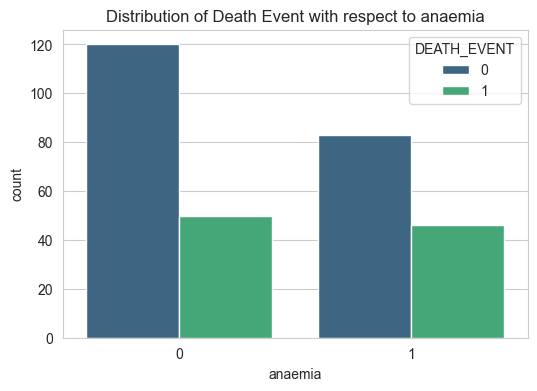

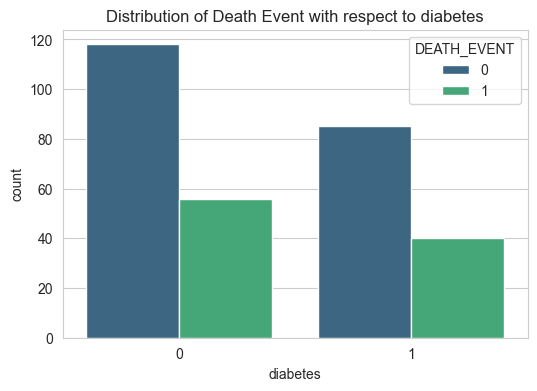

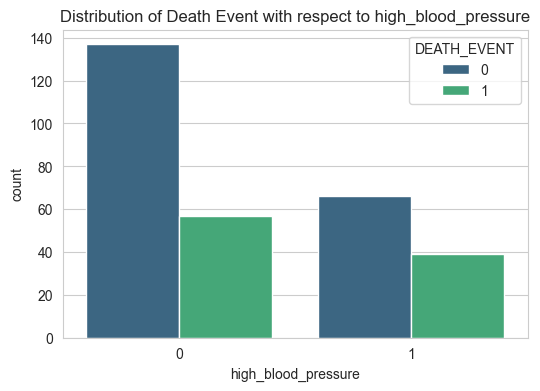

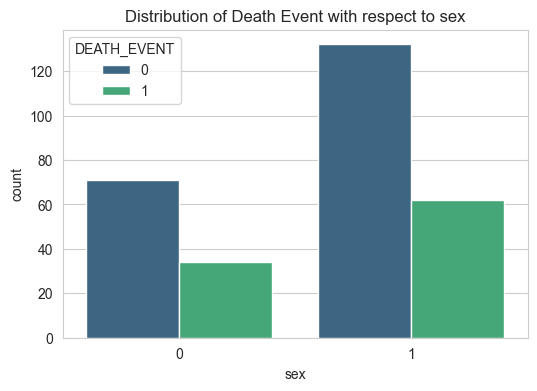

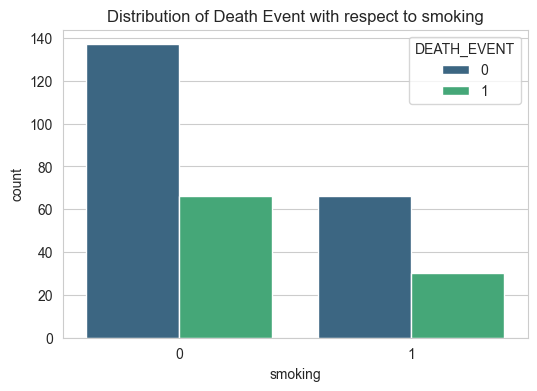

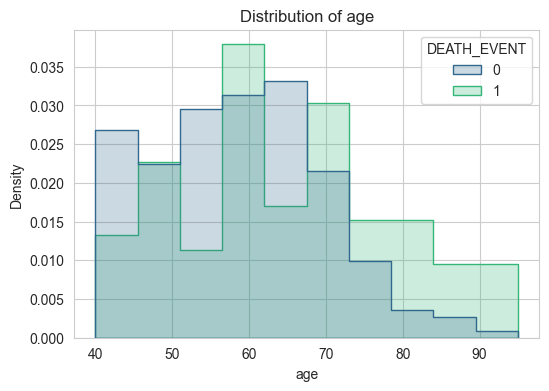

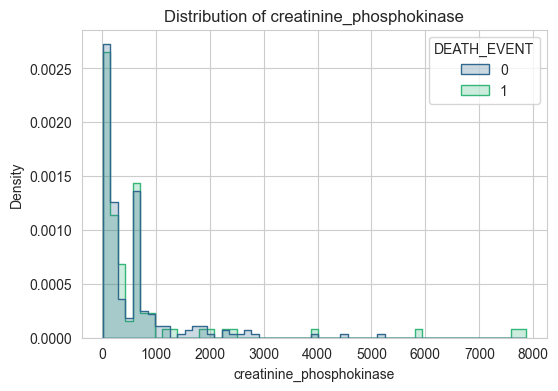

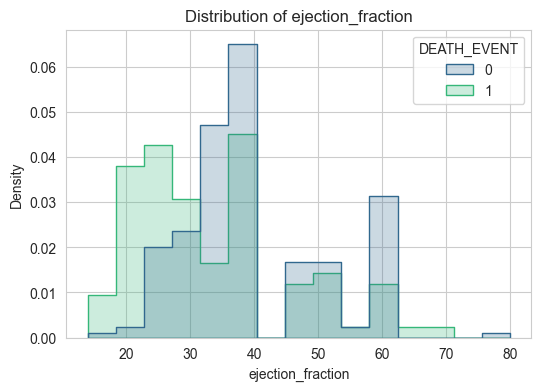

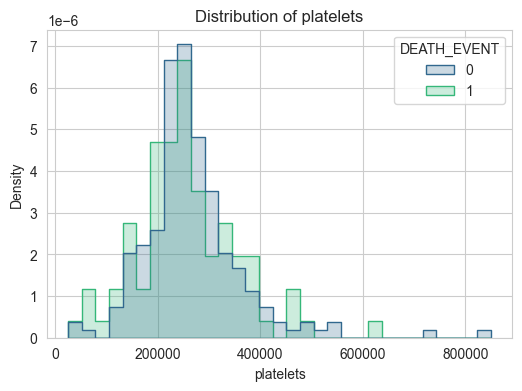

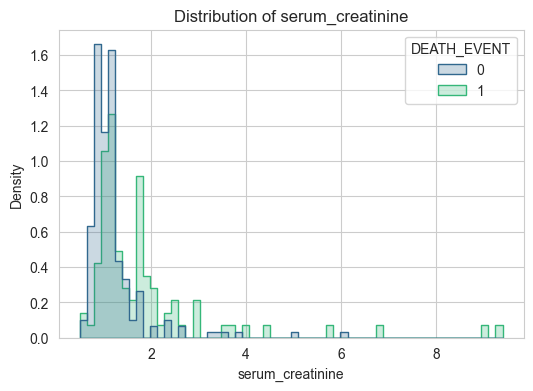

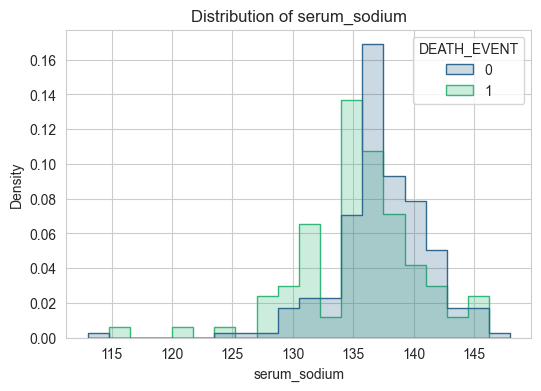

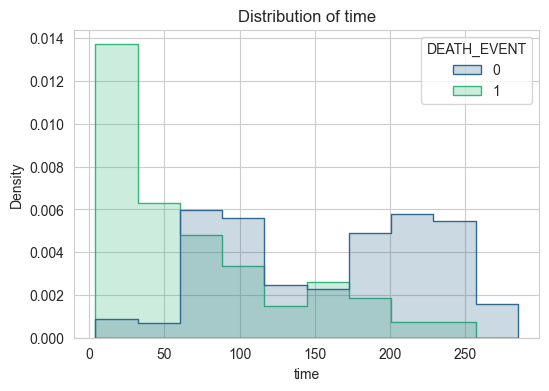

In [4]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a function to create bar plots for categorical features
def bar_plot(feature, df=heart_failure_data):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='DEATH_EVENT', palette='viridis')
    plt.title(f'Distribution of Death Event with respect to {feature}')
    plt.show()

# Creating bar plots for categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for feature in categorical_features:
    bar_plot(feature)

# Creating a function to create histograms for continuous features
def hist_plot(feature, df=heart_failure_data):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='DEATH_EVENT', element='step', stat='density', common_norm=False, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Creating histograms for continuous features
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
for feature in continuous_features:
    hist_plot(feature)
    

In [5]:
# Data Preprocessing
X = heart_failure_data.drop(columns=['DEATH_EVENT'])
y = heart_failure_data['DEATH_EVENT']


In [6]:

# Normalizing the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [8]:


# Define the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(8, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Train the model
history = model.fit(
    X_train, y_train.values,  # Ensure y_train is a Numpy array
    validation_split=0.2,  # 20% of the training data is used for validation
    epochs=100,  # Number of iterations over the entire training dataset
    batch_size=10  # Number of samples per gradient update
)

Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.5772 - accuracy: 0.7016 - val_loss: 0.6004 - val_accuracy: 0.7500
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7330 - val_loss: 0.5901 - val_accuracy: 0.7500
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7435 - val_loss: 0.5812 - val_accuracy: 0.7500
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 0.7696 - val_loss: 0.5712 - val_accuracy: 0.7292
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5044 - accuracy: 0.7801 - val_loss: 0.5606 - val_accuracy: 0.7292
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4899 - accuracy: 0.7801 - val_loss: 0.5499 - val_accuracy: 0.7292
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4770 - accuracy: 0.7801 - val_loss: 0.5401 - val_accuracy: 0.7500
Epoch 8/100


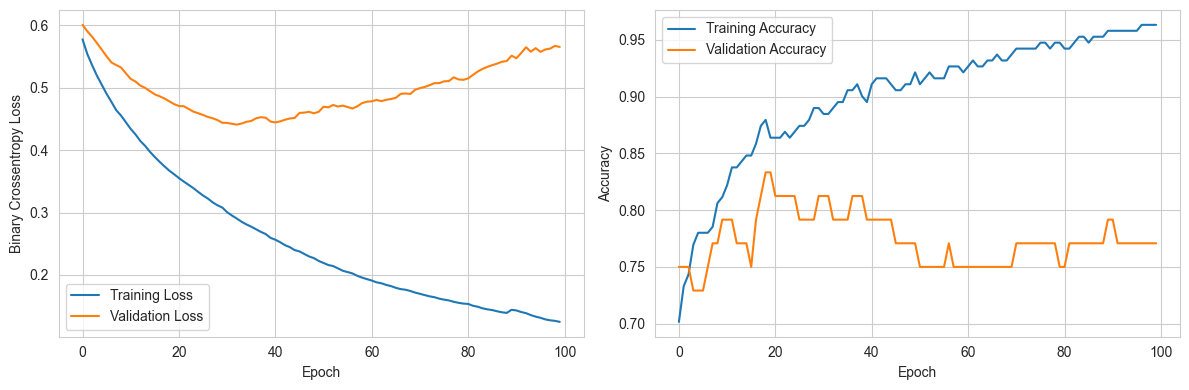

In [10]:
# Visualize the model's training progress
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()